# WeatherPy

---

##  Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [43]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [44]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | kamaishi
Processing Record 11 of Set 1 | baoding
Processing Record 12 of Set 1 | daru
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | tazovsky
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | naze
Processing Record 21 of Set 1 | dunedin
Processing Record 22 of Set 1 | aasiaat
Processing Re

Processing Record 41 of Set 4 | new norfolk
Processing Record 42 of Set 4 | luderitz
Processing Record 43 of Set 4 | campoverde
Processing Record 44 of Set 4 | idri
Processing Record 45 of Set 4 | toropets
Processing Record 46 of Set 4 | longyearbyen
Processing Record 47 of Set 4 | simpang
Processing Record 48 of Set 4 | thompson
Processing Record 49 of Set 4 | salamanca
Processing Record 0 of Set 5 | flin flon
Processing Record 1 of Set 5 | poronaysk
Processing Record 2 of Set 5 | fuvahmulah
City not found. Skipping...
Processing Record 3 of Set 5 | anton lizardo
Processing Record 4 of Set 5 | college
Processing Record 5 of Set 5 | roma
Processing Record 6 of Set 5 | maumere
Processing Record 7 of Set 5 | bollnas
Processing Record 8 of Set 5 | mamu kanjan
Processing Record 9 of Set 5 | newman
Processing Record 10 of Set 5 | suva
Processing Record 11 of Set 5 | kassala
Processing Record 12 of Set 5 | carrara
Processing Record 13 of Set 5 | at taj
Processing Record 14 of Set 5 | island 

Processing Record 32 of Set 8 | tanki leendert
City not found. Skipping...
Processing Record 33 of Set 8 | mount isa
Processing Record 34 of Set 8 | kuhdasht
Processing Record 35 of Set 8 | redencao
Processing Record 36 of Set 8 | bikenibeu village
Processing Record 37 of Set 8 | ocean city
Processing Record 38 of Set 8 | labuan
Processing Record 39 of Set 8 | puerto leguizamo
Processing Record 40 of Set 8 | puerto colombia
Processing Record 41 of Set 8 | bhimunipatnam
Processing Record 42 of Set 8 | visby
Processing Record 43 of Set 8 | anloga
Processing Record 44 of Set 8 | uliastay
Processing Record 45 of Set 8 | barra de santo antonio
Processing Record 46 of Set 8 | mont-dore
Processing Record 47 of Set 8 | muisne
Processing Record 48 of Set 8 | benguela
Processing Record 49 of Set 8 | tapes
Processing Record 0 of Set 9 | petauke
Processing Record 1 of Set 9 | mutuali
Processing Record 2 of Set 9 | sinop
Processing Record 3 of Set 9 | tucuma
Processing Record 4 of Set 9 | yangambi


Processing Record 21 of Set 12 | hotan
Processing Record 22 of Set 12 | punta alta
Processing Record 23 of Set 12 | oranjemund
Processing Record 24 of Set 12 | machico
Processing Record 25 of Set 12 | nabire
Processing Record 26 of Set 12 | ellsworth
Processing Record 27 of Set 12 | atafu village
Processing Record 28 of Set 12 | homer
Processing Record 29 of Set 12 | namibe
Processing Record 30 of Set 12 | fada
Processing Record 31 of Set 12 | baiquan
Processing Record 32 of Set 12 | elk city
Processing Record 33 of Set 12 | midvagur
Processing Record 34 of Set 12 | aiquile
Processing Record 35 of Set 12 | la maddalena
Processing Record 36 of Set 12 | kununurra
Processing Record 37 of Set 12 | kalaleh
Processing Record 38 of Set 12 | hadibu
Processing Record 39 of Set 12 | prineville
Processing Record 40 of Set 12 | zeya
Processing Record 41 of Set 12 | las juntas
Processing Record 42 of Set 12 | nema
Processing Record 43 of Set 12 | ahau
City not found. Skipping...
Processing Record 4

In [45]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [46]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,32.56,94,100,4.97,CL,1687730834
1,margaret river,-33.9500,115.0667,45.84,84,71,8.70,AU,1687731017
2,ushuaia,-54.8000,-68.3000,37.06,81,100,6.91,AR,1687731017
3,codrington,-38.2667,141.9667,53.31,80,99,19.17,AU,1687731018
4,avarua,-21.2078,-159.7750,80.65,89,40,6.91,CK,1687731018


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [48]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,32.56,94,100,4.97,CL,1687730834
1,margaret river,-33.9500,115.0667,45.84,84,71,8.70,AU,1687731017
2,ushuaia,-54.8000,-68.3000,37.06,81,100,6.91,AR,1687731017
3,codrington,-38.2667,141.9667,53.31,80,99,19.17,AU,1687731018
4,avarua,-21.2078,-159.7750,80.65,89,40,6.91,CK,1687731018


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

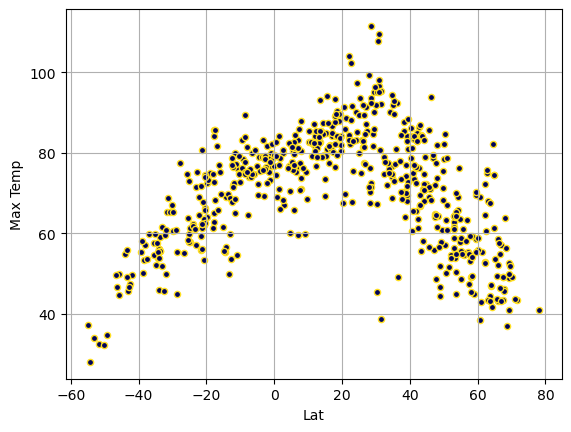

In [64]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", 
                  color = '#00035b', edgecolor ='#ffdf22', grid = True)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

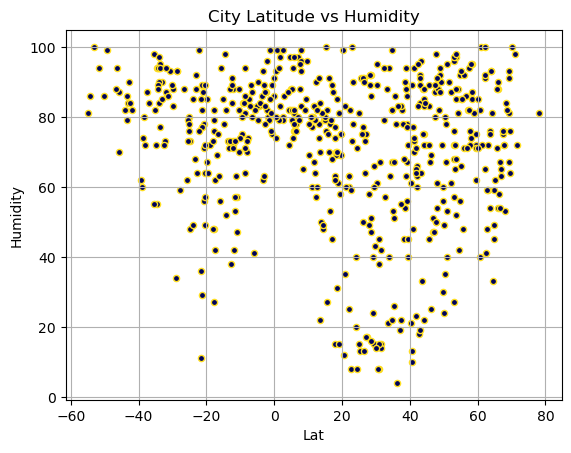

In [50]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", 
                  color = '#00035b', edgecolor ='#ffdf22', grid = True, 
                  title = "City Latitude vs Humidity")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

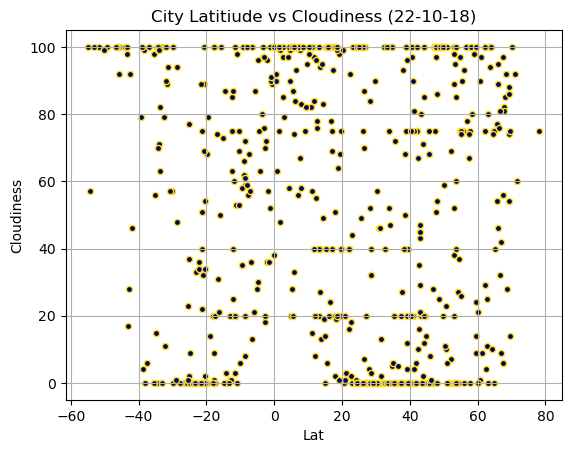

In [51]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", 
                  color = '#00035b', edgecolor ='#ffdf22', grid = True,
                 title = "City Latitiude vs Cloudiness (22-10-18)" )
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

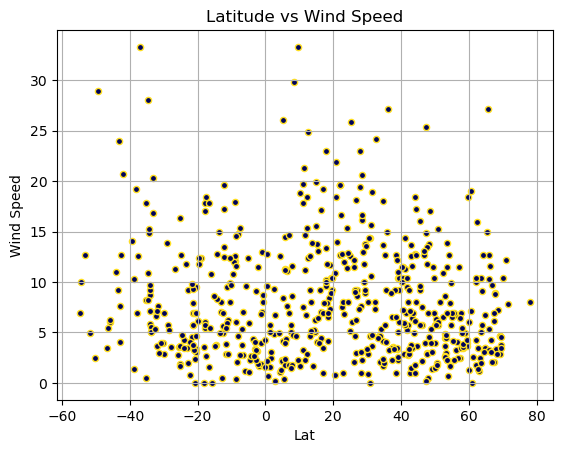

In [52]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", 
                  color = '#00035b', edgecolor ='#ffdf22', grid = True,
                 title = "Latitude vs Wind Speed")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots


def regression(x_values,y_values,coords,Ylabel,title,fig_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coords,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(Ylabel)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(fig_name)
    plt.show()

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,anadyr,64.7500,177.4833,61.30,59,0,6.71,RU,1687731019
9,kamaishi,39.2667,141.8833,68.02,86,12,2.28,JP,1687731020
10,baoding,38.8511,115.4903,76.91,63,100,3.40,CN,1687731021
13,bilibino,68.0546,166.4372,63.70,53,85,3.38,RU,1687731022
15,iqaluit,63.7506,-68.5145,44.33,76,100,10.36,CA,1687730735


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"]<=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,32.56,94,100,4.97,CL,1687730834
1,margaret river,-33.9500,115.0667,45.84,84,71,8.70,AU,1687731017
2,ushuaia,-54.8000,-68.3000,37.06,81,100,6.91,AR,1687731017
3,codrington,-38.2667,141.9667,53.31,80,99,19.17,AU,1687731018
4,avarua,-21.2078,-159.7750,80.65,89,40,6.91,CK,1687731018


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.41583364734696104


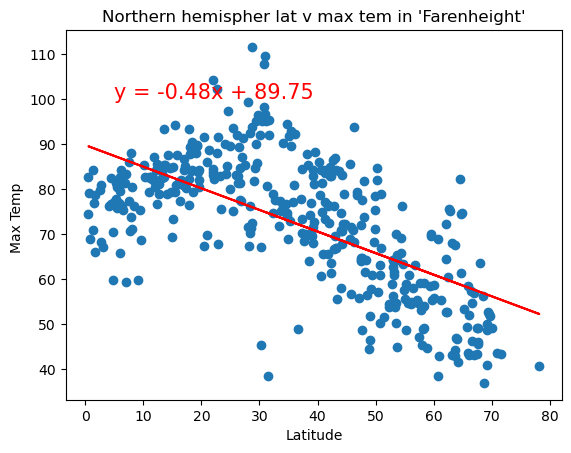

In [56]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
coords = (5,100)
Ylabel = "Max Temp "
title = "Northern hemispher lat v max tem in 'Farenheight'"
fig_name = "images/northernmaxtemp.png"
regression(x_values,y_values,coords,Ylabel,title,fig_name)

The r-squared is: 0.6879318290042772


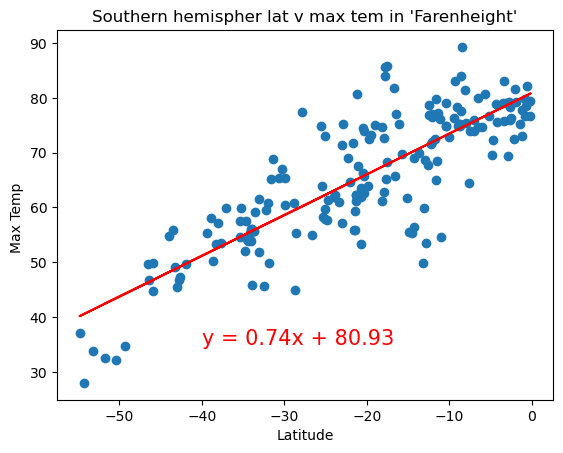

In [57]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
coords = (-40,35)
Ylabel = "Max Temp "
title = "Southern hemispher lat v max tem in 'Farenheight'"
fig_name = "images/southernmaxtemp.png"
regression(x_values,y_values,coords,Ylabel,title,fig_name)

**Discussion about the linear relationship:** They are opposite slopes, one has positive correlation (southern) and the other has negative correlation (northern)

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0007127255411755543


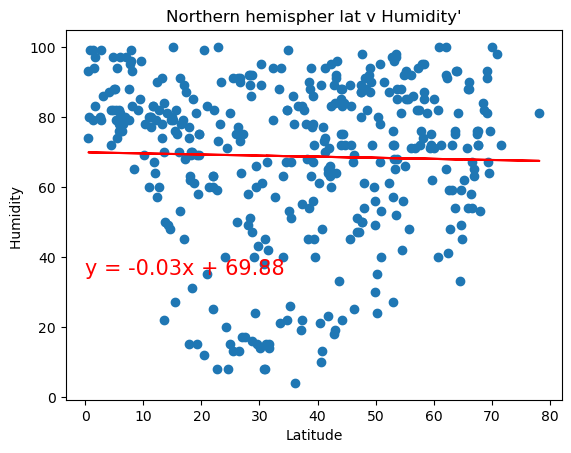

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
coords = (0,35)
Ylabel = "Humidity "
title = "Northern hemispher lat v Humidity'"
fig_name = "images/northernhumidity.png"
regression(x_values,y_values,coords,Ylabel,title,fig_name)

The r-squared is: 0.01670958448678973


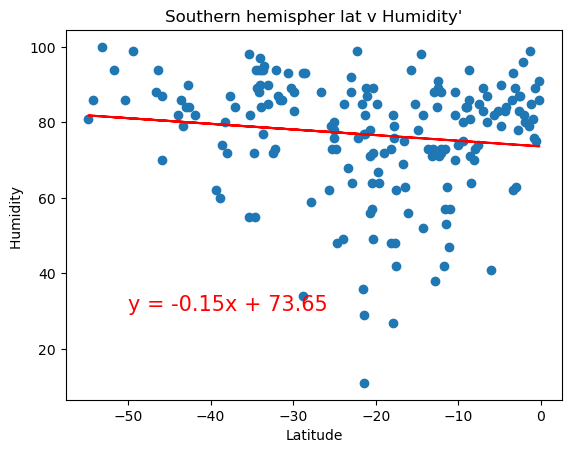

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
coords = (-50,30)
Ylabel = "Humidity "
title = "Southern hemispher lat v Humidity'"
fig_name = "images/southernhumidity.png"
regression(x_values,y_values,coords,Ylabel,title,fig_name)

**Discussion about the linear relationship:** both have around the same slopes that are negative, having a negative relationship with humidity and latitude. There is a low r-squared variation in this data compared to the whole set, meaning less variablity

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0047056102818398525


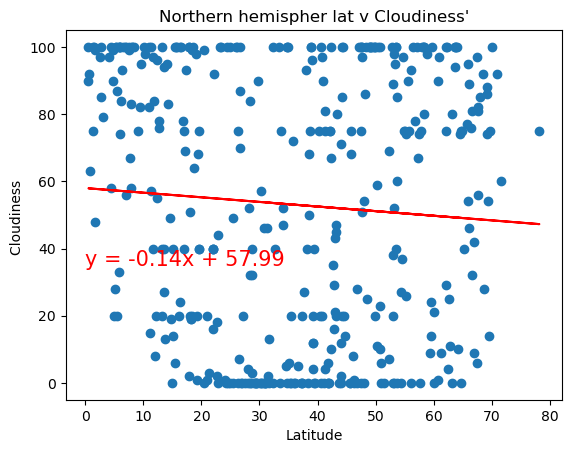

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
coords = (0,35)
Ylabel = "Cloudiness "
title = "Northern hemispher lat v Cloudiness'"
fig_name = "images/northernCloudiness.png"
regression(x_values,y_values,coords,Ylabel,title,fig_name)

The r-squared is: 0.016024826949117377


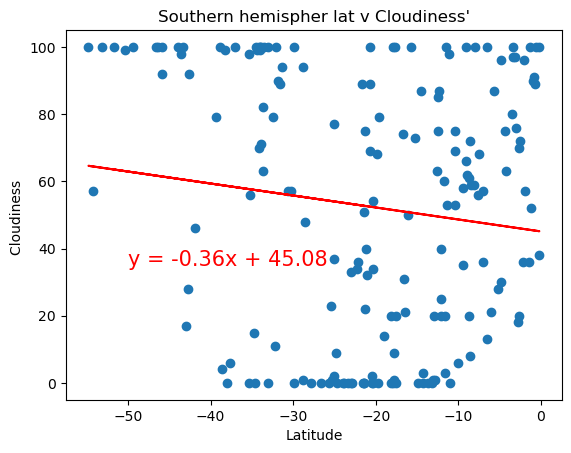

In [67]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
coords = (-50,35)
Ylabel = "Cloudiness "
title = "Southern hemispher lat v Cloudiness'"
fig_name = "images/SouthernCloudiness.png"
regression(x_values,y_values,coords,Ylabel,title,fig_name)

**Discussion about the linear relationship:** Both have a negative slope, one more negative than the other meaning the bigger the latitude less cloudiness. For the r- squared value, not much of the variation in this data is explained by the latitude/cloudiness relationship

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.027277005656264616


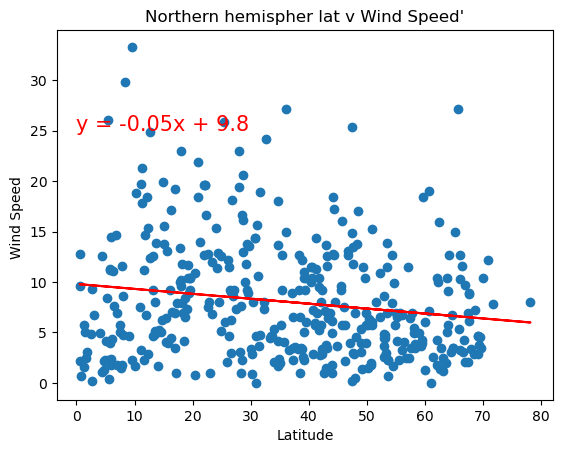

In [66]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
coords = (0,25)
Ylabel = "Wind Speed "
title = "Northern hemispher lat v Wind Speed'"
fig_name = "images/northernWindSpeed.png"
regression(x_values,y_values,coords,Ylabel,title,fig_name)

The r-squared is: 0.05321380596338385


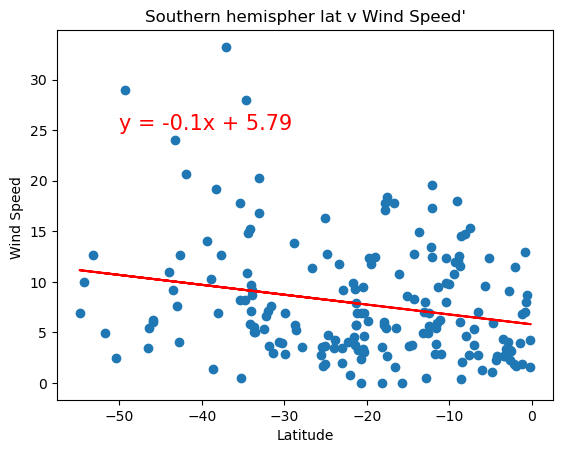

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
coords = (-50,25)
Ylabel = "Wind Speed "
title = "Southern hemispher lat v Wind Speed'"
fig_name = "images/SouthernWindSpeed.png"
regression(x_values,y_values,coords,Ylabel,title,fig_name)

**Discussion about the linear relationship:** Southern hemisphere seems to have lower windspeeds then northern, both have low variation, negative slope, so bigger the latitude, less wind speed